In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [31]:
# So for the plot x-axis is input width, y-axis is normalized bump amplitude, and points are the regime

#change to your directory
dir = '/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src'
file_name = '/d90.txt' #change to yours
header = ['ampliini', 'ampliaft', 'width', 'behaviour','amp'] #from their code
df = pd.read_csv(dir + file_name, delimiter=' ', header=None, names=header)  # space seperated
df['normalized_bump_amplitude'] = df.iloc[:, 1]/df.iloc[:, 0] # Im pretty sure this is the right thing to do here.
bump_width = df['width'].to_numpy() #nice to isolate

In [32]:
filtered_df = df[df['normalized_bump_amplitude'] <= 1.8] #this is different for the models - check the paper
filtered_df[filtered_df['behaviour'] == 2]

,ampliini,ampliaft,width,behaviour,amp,normalized_bump_amplitude
37,0.076707,0.113771,0.010000,2,1.110750,1.483189
47,0.076707,0.113688,0.010000,2,1.107775,1.482107
48,0.076707,0.114603,0.010000,2,1.140500,1.494036
49,0.076707,0.115434,0.010000,2,1.170250,1.504869
67,0.076707,0.113240,0.024664,2,0.515750,1.476267
...,...,...,...,...,...,...
9287,0.076707,0.124758,2.341531,2,0.515750,1.626423
9288,0.076707,0.127449,2.341531,2,0.545500,1.661504
9289,0.076707,0.130141,2.341531,2,0.575250,1.696599
9290,0.076707,0.132833,2.341531,2,0.605000,1.731693


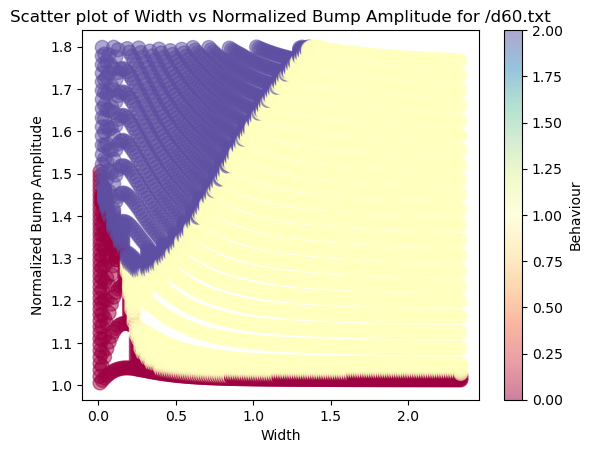

In [8]:
plt.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], s=100, alpha=0.5, cmap='Spectral')
plt.colorbar(label='Behaviour')
plt.xlabel('Width')
plt.ylabel('Normalized Bump Amplitude')
plt.title(f'Scatter plot of Width vs Normalized Bump Amplitude for {file_name}')
plt.show()

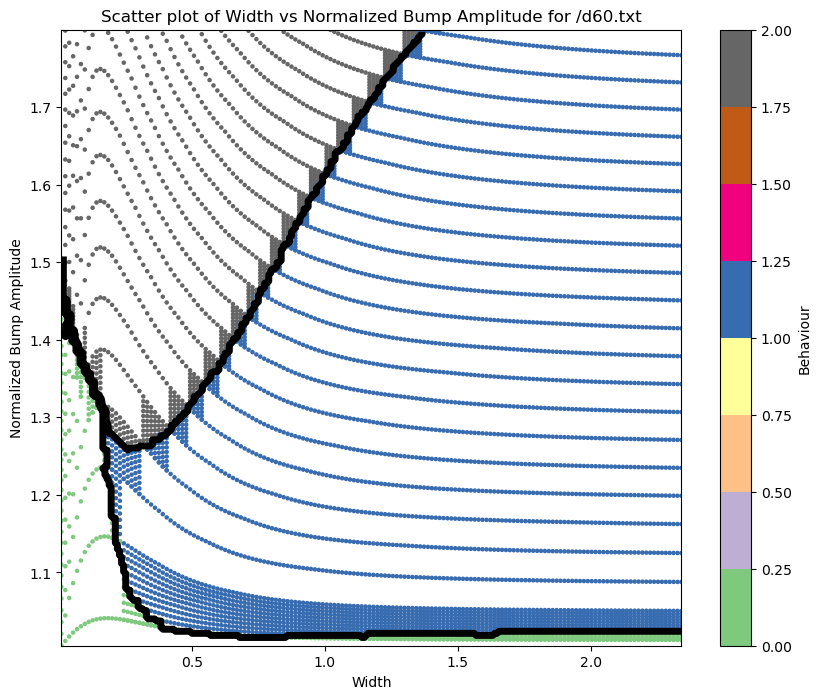

In [9]:
# Create a 2D histogram or grid for contour plotting
x = filtered_df['width'].to_numpy()
y = filtered_df['normalized_bump_amplitude'].to_numpy()
z = filtered_df['behaviour'].to_numpy()

#Interpolation grid
xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((x, y), z, (xi, yi), method='linear')

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], 
                       s=5, alpha=1, cmap='Accent')
plt.colorbar(scatter, label='Behaviour')

# Add contour lines
colours = ['black', 'black', 'black']
contour = plt.contour(xi, yi, zi, levels=np.unique(z), colors=colours, linewidths=5)

# Labels and title
plt.xlabel('Width')
plt.ylabel('Normalized Bump Amplitude')
plt.title(f'Scatter plot of Width vs Normalized Bump Amplitude for {file_name}')
plt.show()

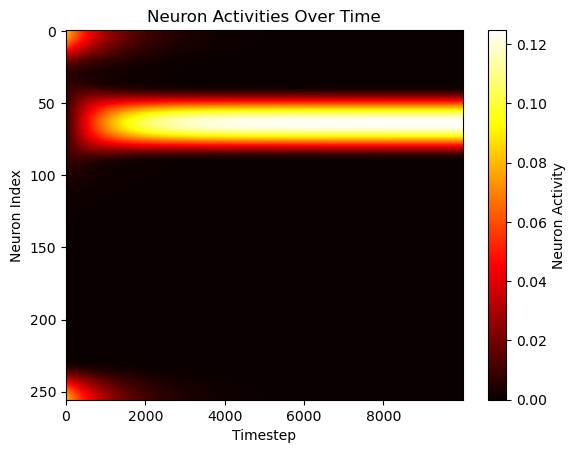

In [70]:
import numpy as np
import matplotlib.pyplot as plt

#NB! FOR CLI ITS AMPLITUDE THEN WIDTH
# Load neuron activity data
data = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/single_run_activity.dat")

# Plot neuron activity over time
plt.imshow(data.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Neuron Activities Over Time")
plt.show()

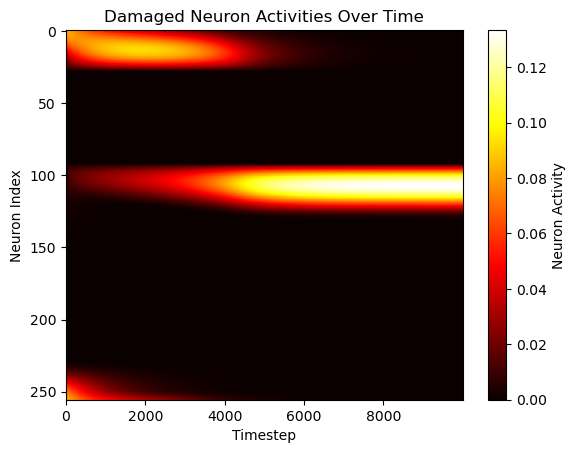

In [73]:
#NB! FOR CLI ITS AMPLITUDE THEN WIDTH
# Load neuron activity data
data2 = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/single_run_damage_activity.dat")

# Plot neuron activity over time
plt.imshow(data2.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Damaged Neuron Activities Over Time")
plt.show()

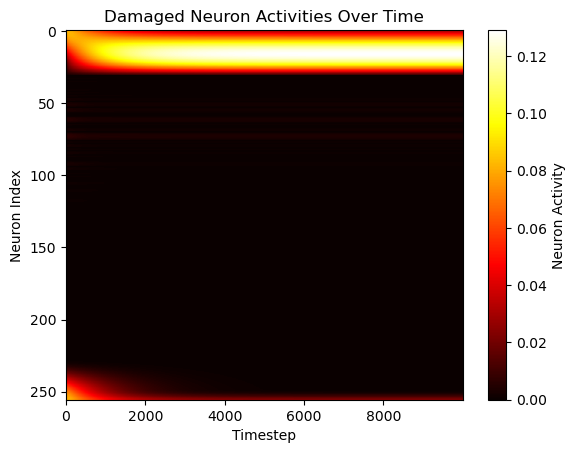

In [85]:
# Load neuron activity data
data3 = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/single_run_random_damage_activity.dat")

# Plot neuron activity over time
plt.imshow(data3.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Damaged Neuron Activities Over Time")
plt.show()

In [69]:
from matplotlib.animation import FFMpegWriter

metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'dead_neurons_90_85_64.mp4', 100):
    for i in range(5500):
        plt.plot(data2[i])
        writer.grab_frame()
        plt.clf()



<Figure size 640x480 with 0 Axes>

In [55]:
metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'normal_neurons_90_0.515750_2.3415.mp4', 100):
    for i in range(5500):
        plt.plot(data[i])
        writer.grab_frame()
        plt.clf()

<Figure size 640x480 with 0 Axes>

### TO DO:

try to do random damage trials - increase number of randomly damaged neurons and generate phase diagram

maximum activity index offset relative to normal - change localizaiton of damage and number of affected neurons; generate phase diagrams for same question. 



